<a href="https://colab.research.google.com/github/sijuswamy/Mathematics-For-Machine-Learning/blob/main/Gradient_and_Newtons'_Method_in_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient- Descent Method

Gradient Descent is an optimization algorithm in machine learning used to minimize a function by iteratively moving towards the minimum value of the function.

We basically use this algorithm when we have to find the least possible values that can satisfy a given cost function. In machine learning, more often that not we try to minimize loss functions (like Mean Squared Error). By minimizing the loss function , we can improve our model, and Gradient Descent is one of the most popular algorithms used for this purpose.

The fact that the negative gradient direction - at least locally - provides a descent direction for the function itself combined with the fact that gradients are often cheap to compute makes gradient descent a superb local optimization method.

To this point we can very easily compute the gradient of almost any generic function of interest using a gradient calculator known as an Automatic Differentiator. So in practice we need not even have to worry about computing the form of a function's gradient 'by hand'.

Below we provide the generic pseudo-code and Python implementation of the gradient descent algorithm which will be used in a variety of examples that follow in this Section. We describe the most basic yet perhaps the most common implementation, but there are a number of practical variations one can use in practice - like e.g., different halting conditions other than a maximum number of steps, or what values are returned by the method - which we touch on below as well.


> Algorithm

1. input: function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$

2. `for` $\,\,k = 1...K$
$\quad\quad\quad\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$
4.  output: history of weights $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$

Note in particular the return values we have chosen to output in our pseudo-code above: both the entire sequence of gradient descent steps $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding cost function evaluation $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ computed while running the algorithm are returned. Another common choice is more minimalist: simply return the final set of weights $\mathbf{w}^K$, or those providing the corresponding smallest cost function value during the run. We return the entire sequence of weights and cost function evaluations by default because we use them as a debugging tool for propertly setting the steplength / learning rate $\alpha$ via the cost function history plot (we show this in the examples below).

How do we set the $\alpha$ parameter in general? With gradient descent there are a wide variety of paradigmns for choosing the steplength, but the basic (and most commonly used) choices are precisely those we introduced in the (comparatively simpler) context of zero order methods.

> Gradient descent naturally halts near stationary points of a function, commonly near minima or saddle points, since these are where the descent direction vanishes i.e., where $-\nabla g\left(\mathbf{w}^k\right) \approx \mathbf{0}_{N\times 1}$.

## A contextual python implementation of gradient-descent algorithm

Let’s take an example.

Cost function $f(x) = x^2-4x^2+6$

Derivative of $f(x)$ [x_derivative], $f'(x) = 3x^2-8x$ (This will give the slope of any point x along f(x) )

Start with any value of x. Lets say 0.5 and learning_rate = 0.05

Iterate over a number of times and keep calculating value of x.

x = x – (x_derivative * learning_rate)

Notice the Negative Sign, this is so that we keep moving towards the minimum point and not the other way.

x = 0.5 – (-3.25*0.05) = 0.6625

Use x = 0.6625 in second iteration

x = 0.6625+(3.983*0.05) = 0.86165

and so on until we stop seeing any change in the value of x.

The number of iterations can be fixed and given by the user. Or, if you have a precision in mind (~0.001). You can stop calculating once you reach this value of precision.

We will explore both the approaches.

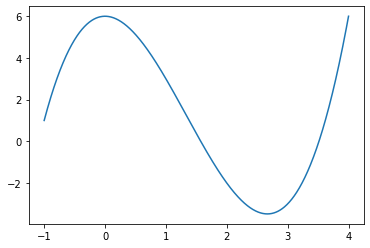

In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
f_x = lambda x: (x**3)-4*(x**2)+6
x = np.linspace(-1,4,1000)#Plot the curve
plt.plot(x, f_x(x))
plt.show()

Now find the derivative of $f(x)$ and use it to define gradient-descent  Let’s create a function to plot gradient descent and also a function to calculate gradient descent by passing a fixed number of iterations as one of the inputs.algorithm.

In [20]:
f_x_derivative = lambda x: 3*(x**2)-8*x

In [21]:
# function to plot gradient
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()
    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()
     
def gradient_iterations(x_start, iterations, learning_rate):
     
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(iterations):
         
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
         
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)        
         
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
        print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)


Local minimum occurs at: 0.66
Local minimum occurs at: 0.86
Local minimum occurs at: 1.09
Local minimum occurs at: 1.35
Local minimum occurs at: 1.62
Local minimum occurs at: 1.87
Local minimum occurs at: 2.10
Local minimum occurs at: 2.28
Local minimum occurs at: 2.41
Local minimum occurs at: 2.50
Local minimum occurs at: 2.56
Local minimum occurs at: 2.60
Local minimum occurs at: 2.63
Local minimum occurs at: 2.64
Local minimum occurs at: 2.65
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.66
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local minimum occurs at: 2.67
Local mini

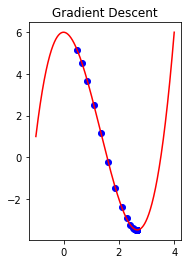

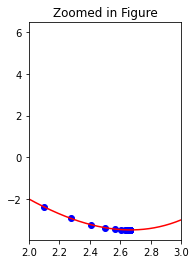

In [22]:
# calling gradient-descent algorithm
gradient_iterations(0.5, 1000, 0.05)

## Disadvantage of this method
We are able to find the Local minimum at 2.67 and as we have given the number of iterations as 1000, Algorithm has taken 1000 steps. It might have reached the value 2.67 at a much earlier iteration. But since we don’t know at what point will our algorithm reach the local minimum with the given learning rate, we give a high value of iteration just to be sure that we find our local minimum.

This doesn’t sound to be very optimal because of the unnecessary number of loop iterations even after it has found the local minimum.

Let’s take another approach of fixing the number of iterations by using precision.

In this approach , Since we know the dataset, we can define the level of precision that we want and stop the algorithm once we reach that level of precision.

For this example let’s write a new function which takes precision instead of iteration number.

In [18]:
#updated model
def gradient_precision(x_start, precision, learning_rate):
    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]

    while True:
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
        
        
        x_grad.append(x_start)        
        y_grad.append(f_x(x_start))
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            break


    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Local minimum occurs at: 2.67
Number of steps taken:  20


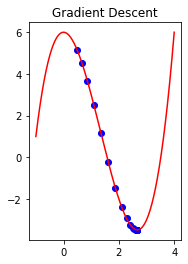

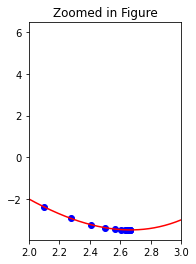

In [19]:
gradient_precision(0.5, 0.001, 0.05)

## A generic Python implementation of the gradient descent algorithm

In [23]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [31]:
g = lambda w: 1/float(50)*(w**4 + w**2) + 0.5 
w = np.array([2.5]); max_its = 5;
alpha = 1
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)

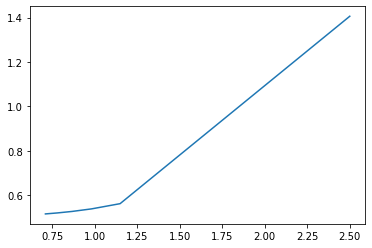

In [32]:
plt.plot(weight_history,cost_history)

# Newton's Method

Newton's method alogorithm can be summarized as:
> Algorithm

1. input: function  $g$ , maximum number of steps  $K$ , initial point  $w^0$ , and regularization parameter  $\epsilon$.
2. `for` $k=1\ldots K$

$\quad\quad\quad\quad\mathbf{w}^{k} = \mathbf{w}^{k-1} - \left(\nabla^2 g(\mathbf{w}^{k-1}) + \epsilon \mathbf{I}_{N\times N}\right)^{-1}\nabla g(\mathbf{w}^{k-1})$
3.  output: history of weights  $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$  and corresponding function evaluations  $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$


In [35]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        beta = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7f84edfd9dd0>


In [36]:
import numpy as np
g = lambda w: 1/float(50)*(w**4 + w**2) + 0.5 
w = np.array([2.5]); max_its = 5;
weight_history,cost_history = newtons_method(g,max_its,w)


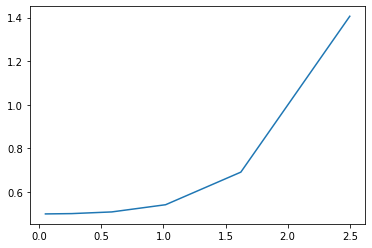

In [37]:
plt.plot(weight_history,cost_history)

In [23]:
#newtons_method(g,K,w)

([array([2.5]),
  array([1.62337668]),
  array([1.01787791]),
  array([0.58455234]),
  array([0.26193956]),
  array([0.05092512]),
  array([0.0005203]),
  array([1.8641498e-09]),
  array([4.66036286e-15]),
  array([1.1650878e-20]),
  array([2.91271222e-26])],
 [array([1.40625]),
  array([0.69160862]),
  array([0.54219055]),
  array([0.50916923]),
  array([0.5014664]),
  array([0.500052]),
  array([0.50000001]),
  array([0.5]),
  array([0.5]),
  array([0.5]),
  array([0.5])])